# ToD Station Data
We will try to manipulate the station data set and also produce isochrome maps. First improting libraires required for manipulaitng geodata and working with osmx.

In [1]:
import pandas as pd
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Reading station data. This is a geojson file downloaded from [California GIS database](https://gis.data.ca.gov/datasets/63697b01616b4df68e2b316e73d7a4d6/explore?filters=eyJDT01NX05FVFdPIjpbIkJBUlQiXX0%3D&location=37.828312%2C-122.221573%2C12.57&showTable=true)

In [2]:
cstations = gpd.read_file("Dataweek4/California_Rail_Stations.geojson")

Doing basic checks with the data

In [3]:
type(cstations)

geopandas.geodataframe.GeoDataFrame

In [4]:
cstations.shape

(292, 18)

In [5]:
cstations.head()

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,PASS_OP,PASS_NETWO,COMM_OP,COMM_NETWO,BUS_ROUTES,TRANSIT,AIRPORT,STATION_TY,INTERMODAL,DIST,CO,geometry
0,1,Parking Garage,MONTEREY - Parking Garage,-,"Tyler, between Del Monte & Franklin",93940,,,,,55,,,2,0,5,MON,POINT (-121.89330 36.60033)
1,2,El Segundo,EL SEGUNDO,ESG,700 South Douglas Street,90245,,,,,1c,,,2,0,7,LA,POINT (-118.38342 33.90512)
2,3,Morgan Hill,MORGAN HILL,MHC,17200 Depot Street,95037,,,PCJPB,Caltrain,55,,,3,1,4,SCL,POINT (-121.65053 37.12966)
3,4,Amtrak Station,OAKLAND COLISEUM,OAC,700 Seventy-third Avenue,94621,Amtrak,Capitol Corridor,,,,"AC Transit,BART",AirBART connector to OAK,6,1,4,ALA,POINT (-122.19820 37.75252)
4,5,Amtrak Station,SANTA BARBARA,SBA,209 State Street,93101,Amtrak,"Coast Starlight,Pacific Surfliner",,,"4,10,17,21",Santa Barbara MTD,,5,1,5,SB,POINT (-119.69260 34.41430)


This looks like a pretty clean dataset. Let us look at the columns

In [6]:
cstations.columns.to_list()

['OBJECTID',
 'LOCATION',
 'STATION',
 'CODE',
 'ADDRESS',
 'ZIP',
 'PASS_OP',
 'PASS_NETWO',
 'COMM_OP',
 'COMM_NETWO',
 'BUS_ROUTES',
 'TRANSIT',
 'AIRPORT',
 'STATION_TY',
 'INTERMODAL',
 'DIST',
 'CO',
 'geometry']

We only need geometry details of select 4 station fromt this list of 245 stops. Here I attempt to find to a spatial merge of this data with a zip code data for Alameda county. My logic is that since stops are Hopefully, it will work.

In [7]:
azip = gpd.read_file('Dataweek4/Zip_Code_Boundaries.geojson')

In [8]:
azip.head()

,OBJECTID,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,SHAPE_Length,SHAPE_Area,geometry
0,1,94502,Alameda,CA,14117,5669.48,2.49,0.121167,0.000659,"MULTIPOLYGON (((-122.22677 37.74798, -122.2268..."
1,2,94577,San Leandro,CA,48666,5993.35,8.12,0.394127,0.002148,"MULTIPOLYGON (((-122.12165 37.72974, -122.1217..."
2,3,94579,San Leandro,CA,20237,6528.06,3.10,0.176203,0.000821,"MULTIPOLYGON (((-122.13297 37.69046, -122.1331..."
3,4,94603,Oakland,CA,33241,11957.19,2.78,0.181344,0.000736,"MULTIPOLYGON (((-122.14867 37.74088, -122.1487..."
4,5,94605,Oakland,CA,42375,4848.40,8.74,0.294314,0.002315,"MULTIPOLYGON (((-122.12917 37.77135, -122.1284..."


In [9]:
list(azip)

['OBJECTID',
 'ZIP_CODE',
 'PO_NAME',
 'STATE',
 'POPULATION',
 'POP_SQMI',
 'SQMI',
 'SHAPE_Length',
 'SHAPE_Area',
 'geometry']

Performing the spatial merge. We put the point-geometry dataframe to the left, and polygon to the right. Let us see if this works.

In [10]:
bstations = cstations.sjoin(azip)


AttributeError: 'GeoDataFrame' object has no attribute 'sjoin'

In [11]:
bstations.head()

NameError: name 'bstations' is not defined

In [12]:
bstations.plot(figsize=(10,10))

NameError: name 'bstations' is not defined

Let us try this gain, but this time we remove all unessary columns in the zipcode dataframe.  

In [13]:
to_keep = ['ZIP_CODE','PO_NAME','geometry']

In [14]:
azip=azip[to_keep]

In [15]:
azip.head()

,ZIP_CODE,PO_NAME,geometry
0,94502,Alameda,"MULTIPOLYGON (((-122.22677 37.74798, -122.2268..."
1,94577,San Leandro,"MULTIPOLYGON (((-122.12165 37.72974, -122.1217..."
2,94579,San Leandro,"MULTIPOLYGON (((-122.13297 37.69046, -122.1331..."
3,94603,Oakland,"MULTIPOLYGON (((-122.14867 37.74088, -122.1487..."
4,94605,Oakland,"MULTIPOLYGON (((-122.12917 37.77135, -122.1284..."


In [16]:
bstations = cstations.sjoin(azip, how="inner", predicate='intersects')

AttributeError: 'GeoDataFrame' object has no attribute 'sjoin'

We again get an attribute error, to which I was unable to find a solution. I need to rethink the logic and the code. Given that this is not essential and that I have other work to do, let us leave this here for now and seek help during the scheduled office hours next thursday.

In [18]:
bstations = gpd.sjoin(cstations, azip)

This code used today in class works! I am also not sure of the logic of this join. Nicole was able to get the 5 stations we needed from the data set. I might not be using this method to do it. However I would like to know why it shows the error

In [19]:
bstations.head()

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,PASS_OP,PASS_NETWO,COMM_OP,COMM_NETWO,...,TRANSIT,AIRPORT,STATION_TY,INTERMODAL,DIST,CO,geometry,index_right,ZIP_CODE,PO_NAME
3,4,Amtrak Station,OAKLAND COLISEUM,OAC,700 Seventy-third Avenue,94621,Amtrak,Capitol Corridor,,,...,"AC Transit,BART",AirBART connector to OAK,6,1,4,ALA,POINT (-122.19820 37.75252),5,94621,Oakland
222,223,,COLISEUM/OAKLAND AIRPORT (OAK),,,0,,,BART,BART,...,,,1,0,4,ALA,POINT (-122.19718 37.75386),5,94621,Oakland
46,47,Amtrak Station,BERKELEY,BKY,University Ave. & 3rd St.,94710,Amtrak,Capitol Corridor,,,...,AC Transit,,4,1,4,ALA,POINT (-122.30087 37.86742),19,94710,Berkeley
47,48,Amtrak Station,FREMONT/CENTERVILLE,FMT,37260 Fremont Blvd. at Peralta Blvd.,94536,Amtrak,Capitol Corridor,SJRRC,ACE,...,AC Transit,,5,1,4,ALA,POINT (-122.00735 37.55890),34,94536,Fremont
229,230,,FREMONT,,,0,,,BART,BART,...,,,1,0,4,ALA,POINT (-121.97765 37.55843),34,94536,Fremont


In [21]:
bstations.shape

(30, 21)

# Isochorne mapping
We will simply replicate the isochorne maping from class as a pratice exersice. The location selected is Fruitvale Transit Village Phase II, Fruitvale, Oakland, a ToD project in Alameda County. 
First, we use osmx to get the data. We are interested in knowing the 5,10,15 and 20 minutes walking distance from the stop. 

In [22]:
station_1 = 'Fruitvale Transit Village Phase II, Fruitvale, Oakland, Alameda County, California, United States'
network_type = 'walk'
trip_times = [5, 10, 15, 20]
meters_per_minute = 75

To pull the data from osm

In [23]:
%%time
st1 = ox.graph_from_address(station_1, network_type=network_type, dist = 1700)

CPU times: user 3.95 s, sys: 81.8 ms, total: 4.03 s
Wall time: 4.04 s


Plotting with osmx

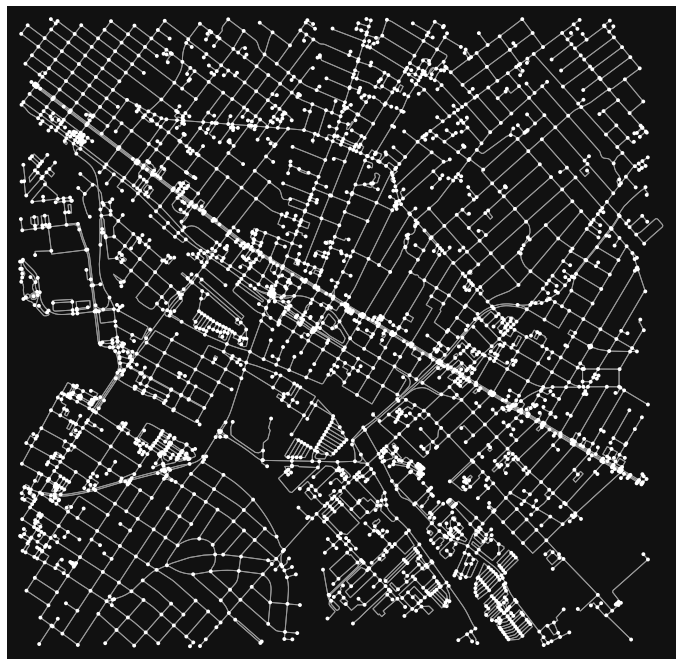

In [24]:
fig, ax = ox.plot_graph(st1,figsize=(12,12))

Projecting data into web mercator and then convert the nodes and edgnes into geodataframes. 

In [25]:
st1 = ox.project_graph(st1, to_crs='epsg:3857')

In [26]:
st1_n, st1_e = ox.graph_to_gdfs(st1)

In [27]:
st1_n.sample(5)

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
5479104034,4.547128e+06,-1.360602e+07,1,-122.224950,37.771013,NaN,POINT (-13606019.152 4547127.886)
4930219416,4.546423e+06,-1.360545e+07,3,-122.219812,37.766005,NaN,POINT (-13605447.181 4546422.630)
53109807,4.546145e+06,-1.360485e+07,4,-122.214453,37.764033,NaN,POINT (-13604850.687 4546145.052)
4930219464,4.545701e+06,-1.360520e+07,1,-122.217632,37.760879,NaN,POINT (-13605204.538 4545700.890)
5455322046,4.548502e+06,-1.360768e+07,1,-122.239833,37.780768,NaN,POINT (-13607675.942 4548501.808)


Checking if the nodes and edges plot well

<AxesSubplot:>

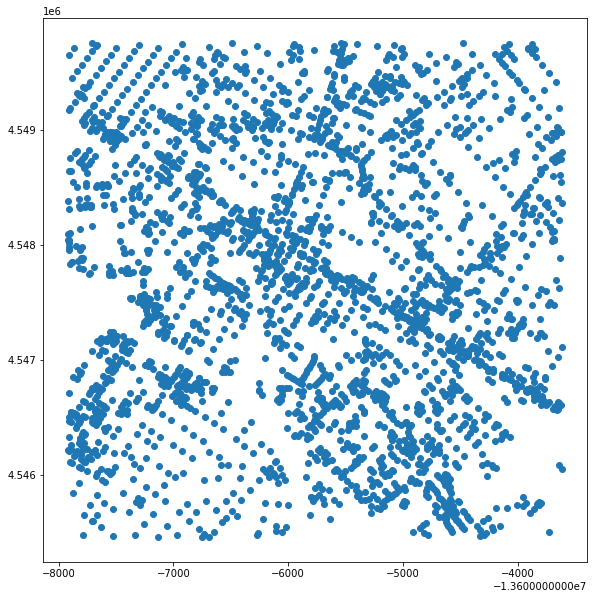

In [28]:
st1_n.plot(figsize=(10,10))

<AxesSubplot:>

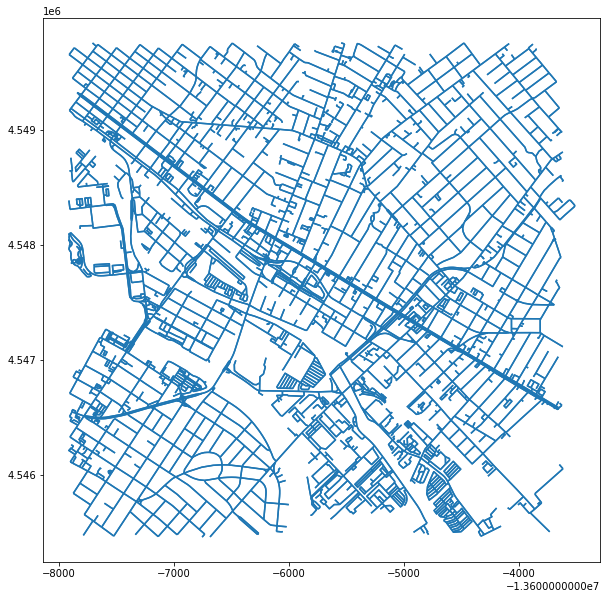

In [29]:
st1_e.plot(figsize=(10,10))

Finding a Centroid. This will be the tod station we have identified. 

In [30]:
minx1, miny1, maxx1, maxy1 = st1_n.geometry.total_bounds
print(minx1)
print(miny1)
print(maxx1)
print(maxy1)

-13607920.277101241
4545457.43519504
-13603614.684100239
4549758.502155105


In [31]:
cen_x1 = (maxx1-minx1)/2 + minx1
cen_y1 = (maxy1-miny1)/2 + miny1
print(cen_x1)
print(cen_y1)

-13605767.48060074
4547607.968675072


In [32]:
cen_n1 = ox.distance.nearest_nodes(st1,Y=cen_y1,X=cen_x1)
print('The id for the nearest node is ' + str(cen_n1))

The id for the nearest node is 7207789206


In [33]:
st1_n.loc[[cen_n1]]

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
7207789206,4.547637e+06,-1.360578e+07,3,-122.222802,37.774628,NaN,POINT (-13605780.071 4547637.047)


Let us plot the nodes and networks together and highlight the centroid 

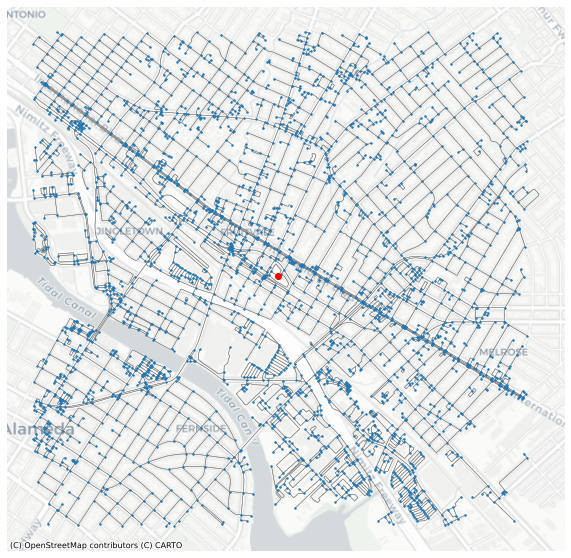

In [34]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
st1_e.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
st1_n.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
st1_n.loc[[cen_n1]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

Thankfully, that works. Now to put the pretty isochrones. We first define walk speed by divind each edge by speed (meter covered per minute).

In [35]:
# create a new column, calculate the time it takes to travel that edge
st1_e['walk_time'] = st1_e['length']/meters_per_minute

In [36]:
st1_e[['osmid','name','highway','length','walk_time']].sample(10)

,,,osmid,name,highway,length,walk_time
u,v,key,,,,,
53093900,53093899,0,6354987,Gleason Way,service,76.385,1.018467
2247637504,6409496730,0,684178957,NaN,footway,9.422,0.125627
9120815208,9120815209,0,986741017,NaN,footway,6.776,0.090347
5479103751,1332025665,0,6367966,50th Avenue,residential,60.913,0.812173
5476662804,5909483396,0,569465734,NaN,service,5.262,0.070160
53089125,53089124,0,168769891,High Street,secondary,94.856,1.264747
53141970,53121739,0,"[415860787, 415860781]",Fernside Boulevard,secondary,76.142,1.015227
5457939119,53073075,0,23580803,33rd Avenue,residential,76.038,1.013840
4930218293,4930218292,0,502601303,NaN,service,15.370,0.204933


Now to assign colours to our 4 distances, we need to create a column in the dataframe and add colours. we will automaticalyl choose 4 equidistant colors from plasma range. Then we do a bit of sorting to assign them to the 4 distances.

In [37]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [38]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [39]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [40]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


In [41]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(st1, cen_n1, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        st1_n.loc[node,'time'] = str(time) + ' mins'
        st1_n.loc[node,'color'] = color

There are 1220 nodes within 20 minutes 
There are 582 nodes within 15 minutes 
There are 217 nodes within 10 minutes 
There are 29 nodes within 5 minutes 


Now we need to give a colour to all nodes outside of the 20 mins. 

In [42]:
# the NaN values then need to be populated with a valid color
st1_n['color'].fillna('#cccccc', inplace=True)

To plot and see how it is

<AxesSubplot:>

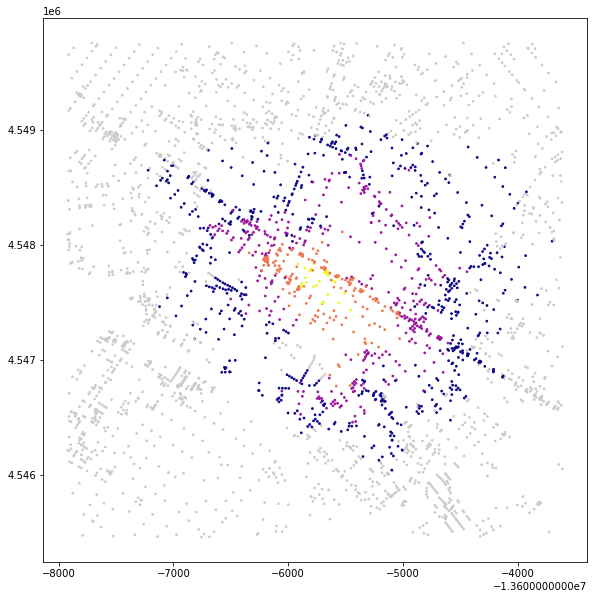

In [43]:
# map it
st1_n.plot(figsize=(10,10),
               color=st1_n['color'],
               markersize=3)

Pleasing. Let us plot this with a basemap. 

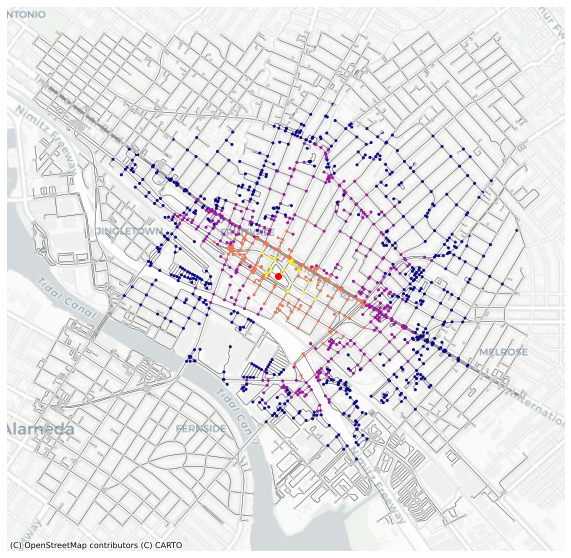

In [44]:
# a "full" map
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
st1_e.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
st1_n.plot(ax=ax,
               color=st1_n['color'],
               markersize=4, 
               zorder=20)

# add the center node in red also to ax
st1_n.loc[[cen_n1]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

I do not know what this function does. 

In [45]:
ison1 = st1_n.dissolve("time")
ison1

,geometry,y,x,street_count,lon,lat,highway,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13606340.264 4547930.903, -136062...",4.546777e+06,-1.360546e+07,4,-122.219940,37.768518,traffic_signals,#ed7953
15 mins,"MULTIPOINT (-13606681.781 4548170.275, -136066...",4.546705e+06,-1.360554e+07,5,-122.220630,37.768013,traffic_signals,#9c179e
20 mins,"MULTIPOINT (-13607219.699 4548650.079, -136071...",4.546438e+06,-1.360521e+07,3,-122.217674,37.766114,turning_circle,#0d0887
5 mins,"MULTIPOINT (-13605916.526 4547834.753, -136058...",4.547435e+06,-1.360546e+07,4,-122.219898,37.773191,crossing,#f0f921


In [46]:
# for each row, create a convex hull
ison1 = ison1.convex_hull.reset_index()
ison1

,time,0
0,10 mins,"POLYGON ((-13605582.802 4546771.935, -13606340..."
1,15 mins,"POLYGON ((-13605217.585 4546429.783, -13605440..."
2,20 mins,"POLYGON ((-13605099.541 4546040.836, -13605886..."
3,5 mins,"POLYGON ((-13605456.810 4547434.684, -13605701..."


In [47]:
# geometry header has been automatically named "0"
# let's rename that
ison1.columns=['time','geometry']

To plot the isochones

<AxesSubplot:>

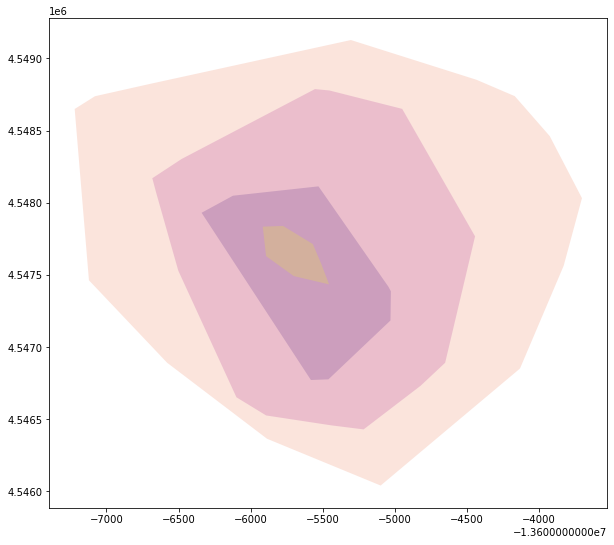

In [48]:
ison1.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

To put the isochrone on a map

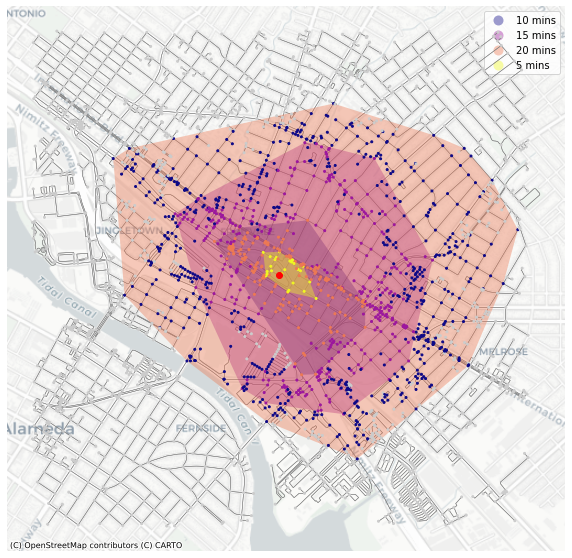

In [49]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
ison1.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the edges to ax
st1_e.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
st1_n.plot(ax=ax,
               color=st1_n['color'],
               markersize=4, 
               zorder=20)

# add the center node in red also to ax
st1_n.loc[[cen_n1]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

Success. Now i will sleep because it is 11:46 and in the meanwhile think how this will be relavant. I for one need to find parameter than walk to define the isochone. then plotting the affordablity/acessiblity maps together should give some decent results. 
Good night. 